In [21]:
#This data combines temperature histories from two artic locations and one temperate zone location
#The limitation in this data is that the artic temperatures have 100+ years of data while the temperate data is 50yrs

In [2]:
# Include this line to make plots interactive
%matplotlib notebook
# Dependencies
import os
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

nl_metadata_path = "data/nl_cc_data.csv"

nl_data = pd.read_csv(nl_metadata_path)

nor_metadata_path = "data/no_cc_data.csv"

nor_data = pd.read_csv(nor_metadata_path)

hk_metadata_path = "data/hk_cc_data.csv"

hk_data = pd.read_csv(hk_metadata_path)

<IPython.core.display.Javascript object>


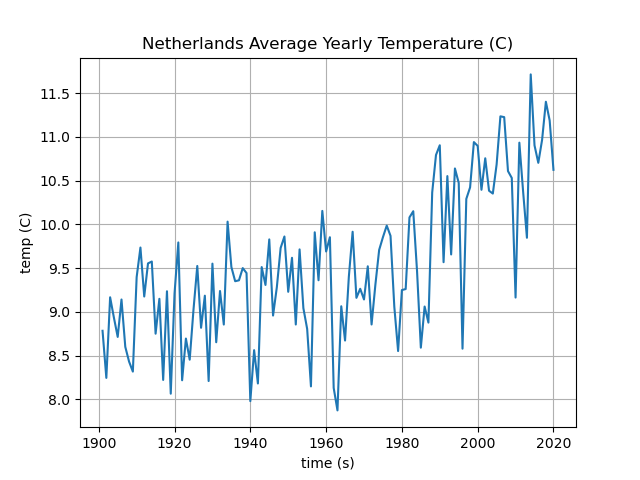

<IPython.core.display.Javascript object>


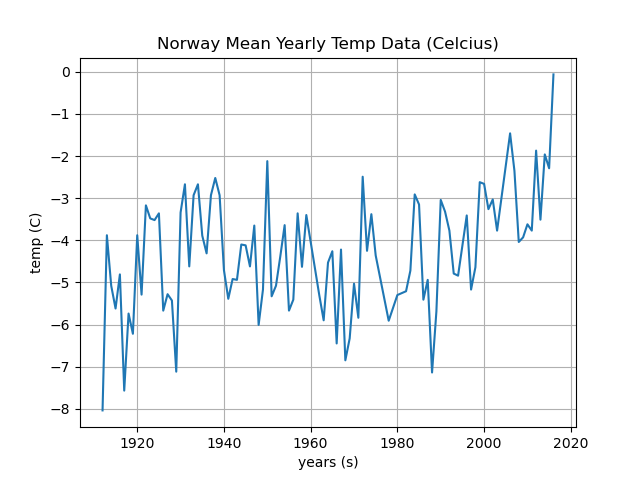

In [19]:
#netherlands temperatures

nl_data["DATE"]= pd.to_datetime(nl_data['DATE'].astype(str),format="%Y/%m/%d")
nl_data['YEAR'] = pd.DatetimeIndex(nl_data["DATE"]).year
mean_temp_list= nl_data["24HR average temp C"]*.1
max_low_list= nl_data["Max low temp C"]*.1
max_high_list= nl_data["Max high temp C"]*.1
nl_data["24avg"]= mean_temp_list
nl_data["MaxLow"] = max_low_list
nl_data["MaxHigh"] = max_high_list
years= (nl_data["YEAR"])
nl_data_df= nl_data.drop(columns=['DATE','24HR average temp C', 'Max low temp C', 'Max high temp C','Sunshine duration in hours'])
year_list= nl_data_df.YEAR.unique()
year_sum= nl_data_df.groupby(['YEAR']).mean()

avg_list= year_sum["24avg"]
type(avg_list)
list_of_temps= avg_list.to_list()
#print(list_of_temps)
#type(list_of_temps)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = year_list
s = list_of_temps

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='temp (C)',
       title='Netherlands Average Yearly Temperature (C)')
ax.grid()

fig.savefig("test.png")
plt.show()

##

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

nor_data= nor_data.dropna()
list_of_metANN= nor_data["metANN"]
max(list_of_metANN)
min(list_of_metANN)
yeartotal= nor_data["YEAR"]
tot_avg= nor_data["metANN"]
yearlist=(nor_data["YEAR"])
list_of_years= nor_data["YEAR"].to_list()

# Data for plotting
t = list_of_years
s = tot_avg

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='years (s)', ylabel='temp (C)',
       title='Norway Mean Yearly Temp Data (Celcius)')
ax.grid()

fig.savefig("test.png")
plt.show()

##



<IPython.core.display.Javascript object>


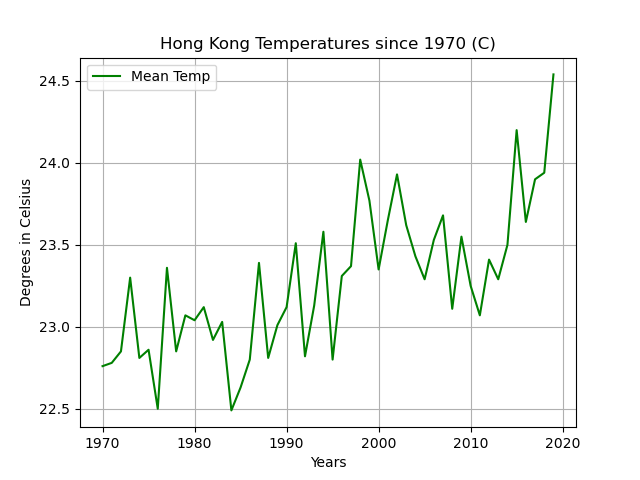

In [20]:
# Include this line to make plots interactive
%matplotlib notebook
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

hk_metadata_path = "data/hk_cc_data.csv"
hk_data = pd.read_csv(hk_metadata_path)
hk_data

hk_data["date"]= pd.to_datetime(hk_data['date'].astype(str),format="%Y/%m/%d")
hk_data['YEAR'] = pd.DatetimeIndex(hk_data["date"]).year
hk_data['year']=pd.DatetimeIndex(hk_data["date"]).year


hk_data_df= hk_data.drop(columns=['Grass_Min_Temp','mean_amount_of_cloud','mean_dew_point_temp', 'mean_wet_bulb_temp', 'pressure','rainfall'])
hk_data_grouped= hk_data_df.groupby(['YEAR']).mean()
hkdata = hk_data_grouped.round(decimals=2)
hk_data.dropna()

a= hkdata["mean_temp"] 
b= hkdata["max_Temp"] 
c= hkdata["min_temp"]
d= hkdata["year"]

# Plot the hong kong yearly temperature averages as a line chart in green
meanavg, = plt.plot(d, a, color="green", label="Mean Temp" )

#(min and max temps are here as place holders for comparison data)

# Plot the hong kong max temp average values in blue
#maxavg, = plt.plot(d, b, color="red",label='Max Avg')

# Plot the unemployment values for a single country
#minavg, = plt.plot(d, c, color="blue",label='Min Avg')


# Create a legend for our chart
#plt.legend(handles=[meanavg, maxavg, minavg], loc="best")
plt.legend(handles=[meanavg], loc="best")


# Add labels to the x and y axes
plt.title("Hong Kong Temperatures since 1970 (C)")
plt.xlabel("Years")
plt.ylabel("Degrees in Celsius")
plt.grid()

# Show the chart
plt.show()